# Training the DL model for target action recognition
## Selected action -- Cleaning Floor

In [1]:
# Import Libraries
import sys

sys.path.append("./")

import numpy as np
import os
from pathlib import Path
import time
import warnings

from sklearn.metrics import accuracy_score
import scrapbook as sb
import torch
import torchvision

from utils_cv.action_recognition.data import Urls
from utils_cv.action_recognition.dataset import VideoDataset
from utils_cv.action_recognition.model import VideoLearner 
from utils_cv.common.gpu import system_info
from utils_cv.common.data import data_path, unzip_url

system_info()
warnings.filterwarnings('ignore')

/home/yangze2065/anaconda3/envs/cv/lib/python3.7/site-packages/scrapbook/__init__.py:8: FutureWarning: 'nteract-scrapbook' package has been renamed to `scrapbook`. No new releases are going out for this old package name.
  warnings.warn("'nteract-scrapbook' package has been renamed to `scrapbook`. No new releases are going out for this old package name.", FutureWarning)


3.7.10 (default, Feb 26 2021, 18:47:35) 
[GCC 7.3.0] 

PyTorch 1.3.1 

Torch-vision 0.4.2 

Available devices:
0: GeForce RTX 2080 Ti


In [2]:
data_path()

PosixPath('/home/yangze2065/Dropbox/2021 Spring/CSCE636/Project/computervision-recipes/data')

In [3]:
# Ensure edits to libraries are loaded and plotting is shown in the notebook.
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Prepare training and validation dataset
## The annotated dataset is kinetics700

In [4]:
# Your data
DATA_PATH = data_path() / "./kinetics700_2020/"

# Number of consecutive frames used as input to the DNN. Use: 32 for high accuracy, 8 for inference speed.
MODEL_INPUT_SIZE = 8

# Number of training epochs
EPOCHS = 20

# Batch size. Reduce if running out of memory.
BATCH_SIZE = 16

# Learning rate
LR = 0.0001

In [5]:
# List of classes
os.listdir(Path(DATA_PATH))

['false', 'cleaning_floor']

In [6]:
data = VideoDataset(DATA_PATH, batch_size=BATCH_SIZE, sample_length=MODEL_INPUT_SIZE)

In [7]:
print(
    f"Training dataset: {len(data.train_ds)} | Training DataLoader: {data.train_dl} \
    \nTesting dataset: {len(data.test_ds)} | Testing DataLoader: {data.test_dl}"
)

Training dataset: 472 | Training DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7fcaa9f41290>     
Testing dataset: 157 | Testing DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7fcaa9ecb350>


<Figure size 432x288 with 0 Axes>

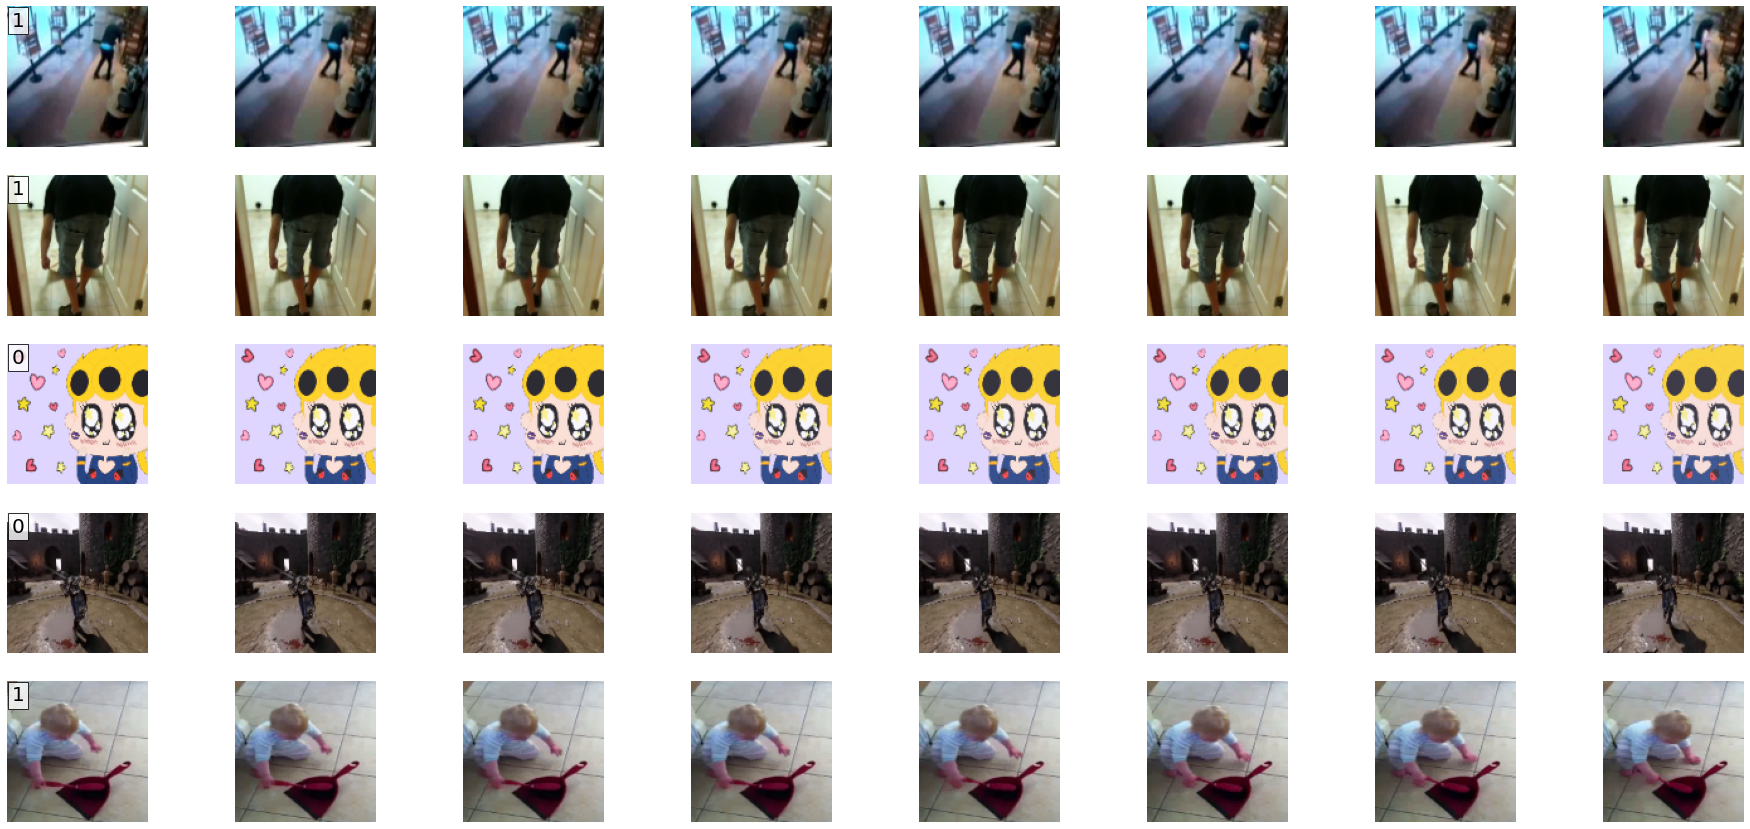

In [8]:
data.show_batch(rows=5, train_or_test="train")

In [9]:
learner = VideoLearner(data, num_classes=2)

Loading r2plus1d_34_8_ig65m model


Using cache found in /home/yangze2065/.cache/torch/hub/moabitcoin_ig65m-pytorch_master


In [10]:
learner.model.fc

Linear(in_features=512, out_features=2, bias=True)

Params to learn:
	full network
Epoch 1 =========================================================
lr=[0.0001]
 Phase train: batch 10 of 30
 Phase train: batch 20 of 30
 Phase train: batch 30 of 30
train took 30.68 sec | loss = 0.6303 | top1_acc = 62.2881  
 Phase valid: batch 10 of 10
valid took 7.60 sec | loss = 0.5682 | top1_acc = 73.8854  
Epoch 2 =========================================================
lr=[0.0001]
 Phase train: batch 10 of 30
 Phase train: batch 20 of 30
 Phase train: batch 30 of 30
train took 25.12 sec | loss = 0.5209 | top1_acc = 85.8051  
 Phase valid: batch 10 of 10
valid took 6.53 sec | loss = 0.5160 | top1_acc = 81.5287  
Epoch 3 =========================================================
lr=[0.0001]
 Phase train: batch 10 of 30
 Phase train: batch 20 of 30
 Phase train: batch 30 of 30
train took 27.22 sec | loss = 0.4076 | top1_acc = 91.3136  
 Phase valid: batch 10 of 10
valid took 6.66 sec | loss = 0.3847 | top1_acc = 88.5350  
Epoch 4 ======================

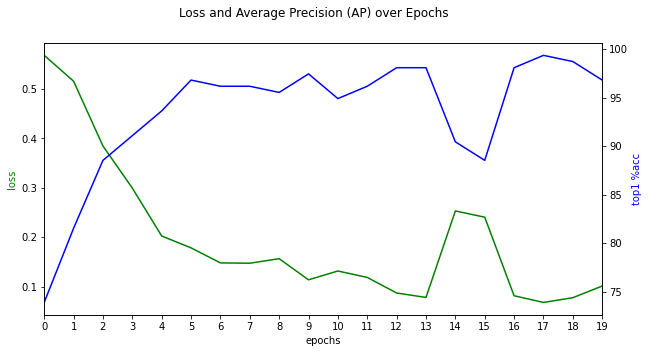

In [11]:
learner.fit(lr=LR, epochs=EPOCHS)

In [12]:
ret = learner.evaluate()

157 samples of torch.Size([3, 8, 112, 112])
Processsing 100 of 157 samples..
Avg. inference time per video (157 clips) = 105.85 ms
Video prediction accuracy = 0.99
Clip prediction accuracy = 0.96


# Let's try one video that is never seen by the model

In [17]:
unknown_vid0 = str(data_path()/"pCQ-JEBhrZY.mp4")

Total frames = 250


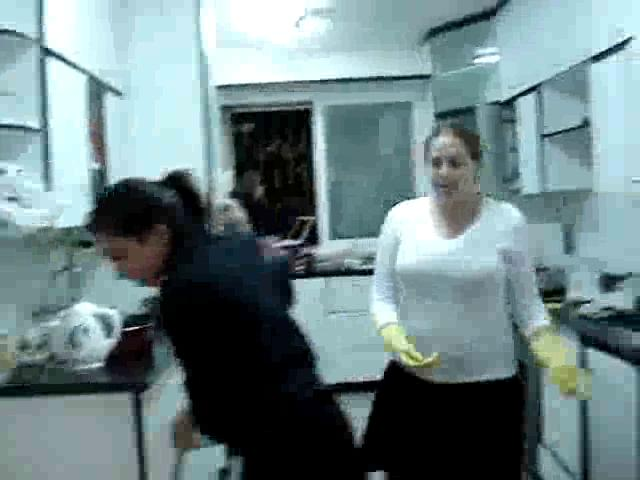

[('false', 0.5318830072879791)]

In [18]:
learner.predict_video(unknown_vid0)

In [19]:
learner.save(model_path = "./checkpoints/R21D_cleaning_floor.pt")